# Import thư viện

In [73]:
import numpy as np 
import pandas as pd 

from collections import Counter
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import imblearn

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import matplotlib
from imblearn.pipeline import Pipeline 
import matplotlib.pyplot as plt
matplotlib.style.use('tableau-colorblind10')
import seaborn as sns
from plotnine import *
import plotly.graph_objects as go
import plotly.express as px
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Loading data

In [39]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Thông tin về kiểu dữ liệu từng cột của dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Xác định số lượng quan sát.

In [40]:
len(df['CLIENTNUM'].unique())

10127

Do trường CLIENTNUM chính là trường đặc trưng cho từng quan sát nên ta lấy len của trường này để ra số lượng quan sát.

In [41]:
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Khai phá dữ liệu

In [43]:
cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


Chia data thành 2 loại: num_col là data dạng định lượng, cat_col là data dạng định tính.

Ma trận hệ số tương quan giữa các biến:

<Axes: >

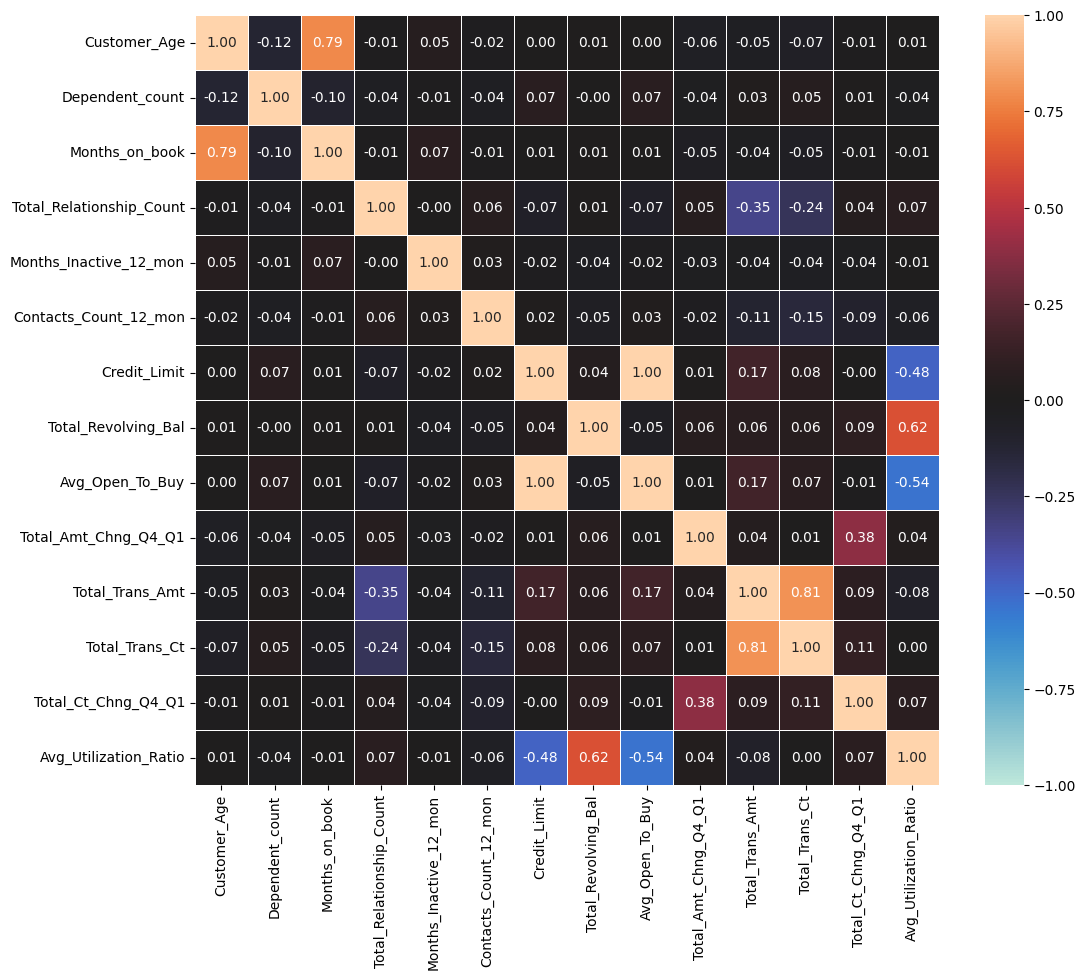

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_col].corr(), vmin=-1.0, vmax=1.0, linewidths=0.5, cmap='icefire', annot=True, fmt='.2f')

# Feature Engineering
Chuyển đổi tập dữ liệu thô ban đầu thành tập các thuộc tính (features) có thể giúp biểu diễn tập dữ liệu ban đầu tốt hơn, tạo điều kiện để giải quyết các bài toán dễ dàng hơn, giúp tương thích với từng mô hình dự đoán cụ thể, cũng như cải thiện độ chính xác của mô hình dự đoán hiện tại.
Cụ thể, với dataset này, thay vì sử dụng tất cả các thuộc tính được cung cấp (23 cột) để đưa vào mô hình phân lớp của mình thì thời gian để máy training rất lâu, đồng thời kết quả dự đoán có độ chính xác thấp. Thay vì làm như vậy, nhóm lựa chọn sử dụng ký thuật feature engineering để chọn ra một số thuộc tính phì hợp hơn như số dư quay vòng, số giao dịch được thực hiện...
Ngoài ra, có thể thu thập thêm các thuộc tính cần thiết khác để bổ sung vào tập dữ liệu ban đầu, khi đó số thuộc tính đưa vào mô hình phân lớp được giảm đi đáng kể giúp tốc độ để máy training nhanh hơn. Hơn nữa, nhờ biểu diễn tốt tập dữ liệu ban đầu mà độ chính xác mô hình phân lớp được cải thiện đáng kể.
Cụ thể, nhóm sẽ tiến hành:
- Binning: Customer_Age, Months_on_book, Credit_Limit, Total_Revolving_Bal,
Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct,
Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
- Weight of Evidence

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Binning

# 4. Data Processing
Xử lý dữ liệu thô.

# 4.1. Xử lý Missing data

In [44]:
# kiểm tra data bị missing
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Tập dữ liệu không có missing value.

# 4.2. Xử lý các giá trị ngoại lệ (Outliers)

In [45]:
from datasist.structdata import detect_outliers
# phát hiện các giá trị ngoại lệ
outliers_indices = detect_outliers(df, features=num_col, n=1.5)
number_of_outliers = len(outliers_indices)

# in ra số lượng giá trị ngoại lệ
print(f'Số giá trị ngoại lệ: {number_of_outliers}')

Số giá trị ngoại lệ: 1274


In [46]:
# xoá bỏ các giá trị ngoại lệ
df = df.drop(outliers_indices)
print(f"Số chiều của dataset sau khi bỏ outliers: {df.shape}")

Số chiều của dataset sau khi bỏ outliers: (8853, 20)


# 4.3. Xử lý dữ liệu định tính
- Danh nghĩa: Các danh mục không có thứ tự hoặc xếp hạng có ý nghĩa như (Cờ tiêu hao, Giới tính, Tình trạng hôn nhân).
- Thứ tự: Các danh mục có thứ tự hoặc xếp hạng có ý nghĩa như (Trình độ học vấn, Danh mục thu nhập, Danh mục thẻ).

In [47]:
# sử dụng phương thức map để xử lý dữ liệu định tính có thứ tự.

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,M,2,5,Married,2,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,0,48,M,2,5,Single,4,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,0,42,M,5,1,Unknown,5,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,0,35,M,3,5,Unknown,3,0,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
14,0,57,F,2,5,Married,1,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


In [48]:
# sử dụng phương thưc get dummies để xử lý dữ liệu định tính danh nghĩa.
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


24 total features after one-hot encoding.


Nhóm lựa chọn Mã hóa one-hot cho dữ liệu định tính không có thứ tự.
Cách truyền thống nhất để đưa dữ liệu hạng mục về dạng số là mã hóa one-hot. Trong cách mã hóa này, một “từ điển” được xây dựng chứa tất cả các giá trị khả dĩ của từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.

In [49]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,44,2,5,2,0,36,3,1,2,...,1088,24,0.846,0.311,False,True,False,True,False,False
9,0,48,2,5,4,0,36,6,3,3,...,1441,32,0.882,0.144,False,True,False,False,True,False
10,0,42,5,1,5,0,31,5,3,2,...,1201,42,0.680,0.217,False,True,False,False,False,True
13,0,35,3,5,3,0,30,5,1,3,...,1311,33,2.000,0.195,False,True,False,False,False,True
14,0,57,2,5,1,0,48,5,2,2,...,1570,29,0.611,0.279,True,False,False,True,False,False


# 4.4. Chia dữ liệu thành tập Train và tập Test

In [50]:
# lấy dữ liệu cho biến dự đoán và biến mục tiêu
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [51]:
x.shape, y.shape

((8853, 23), (8853,))

In [52]:
# chia dữ liệu thành 2 tập: Train và Test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# hiển thị kết quả mẫu cho từng tập
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7082 samples.
Testing set has 1771 samples.


# 4.5. Xử lý dữ liệu mất cân bằng

In [53]:
y_train.value_counts()

Attrition_Flag
0    5940
1    1142
Name: count, dtype: int64

Dữ liệu bị mất cân bằng nên nhóm sử dụng SMOTE để cân bằng dữ liệu vì việc lấy mẫu có thể gây mất dữ liệu và ảnh hưởng đến chất lượng dự đoán khi dữ liệu ban đầu bị mất cân bằng.
SMOTE (Synthetic Minority Over-sampling) là phương pháp sinh mẫu (thuộc phương pháp Over Sampling) nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Để gia tăng kích thước mẫu, với mỗi một mẫu thuộc nhóm thiểu số ta sẽ lựa chọn ra mẫu láng giềng gần nhất với nó và sau đó thực hiện tổ hợp tuyến tính để tạo ra mẫu giả lập. Phương pháp để lựa chọn ra các láng giềng của một quan sát có thể dựa trên thuật toán kNN hoặc SVM.

In [56]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [57]:
y_train.value_counts()

Attrition_Flag
1    5940
0    5940
Name: count, dtype: int64

Bây giờ dữ liệu đã cân bằng.

# 4.6. Chuẩn hoá dữ liệu (Feature Scaling)
Feature Scaling (hay còn gọi là Data Normalization) là một kỹ thuật được sử dụng để chuẩn hoá dữ liệu về cùng phạm vi (same range).
Chuẩn hoá dữ liệu tuần tự với StandardScaler

In [61]:
# tạo hàm StandardScaler
scaler = StandardScaler()

# sử dụng hàm vào tệp dữ liệu train
scaler.fit(X_train[num_col])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[num_col])
X_test_cont_scaled = scaler.transform(X_test[num_col])

# Replacing the scaled continuous features in the original data
X_train[num_col] = X_train_cont_scaled
X_test[num_col] = X_test_cont_scaled

X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.931732,-0.163926,3,1,0,1.154546,-0.331522,0.751478,0.479457,-0.867929,...,-0.307218,-0.379144,-0.212054,-0.887260,True,False,False,True,False,False
1,-0.708602,0.664771,4,5,0,-0.933402,1.665344,-1.539401,0.479457,-0.469235,...,0.408667,1.045911,-0.307518,1.660662,False,True,True,False,False,False
2,-2.075548,-0.992623,4,1,1,0.040974,1.665344,0.751478,2.467920,1.282810,...,1.356445,0.632186,-0.078405,-0.887260,False,True,False,False,True,False
3,1.205121,-0.163926,3,1,0,1.015350,0.999722,-0.393962,-1.509006,-0.716591,...,0.296976,0.770094,-0.274106,1.234825,True,False,True,False,False,False
4,-0.708602,0.664771,5,2,0,-0.933402,0.999722,-1.539401,0.479457,-0.767367,...,-0.228503,0.080551,1.081478,1.025456,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,0.384954,-0.163926,5,1,0,0.319367,0.999722,-0.393962,-0.514774,-0.725733,...,-1.056080,-1.712261,0.803073,-0.887260,True,False,False,True,True,False
11876,-0.435213,0.664771,5,1,0,0.040974,-1.662767,-0.393962,1.473689,-0.861658,...,-0.614280,-0.654961,-0.985870,-0.887260,True,False,False,True,True,False
11877,-0.298519,0.664771,1,5,0,0.040974,-0.997145,0.751478,-0.514774,-0.145223,...,-0.372460,-0.471083,-1.665567,-0.576274,False,True,False,True,True,False
11878,2.025289,-0.992623,2,2,0,1.432940,-0.997145,0.751478,-0.514774,0.329941,...,0.541278,0.632186,-0.047446,0.234086,True,True,False,False,True,False


# 5. Huấn luyện mô hình và đánh giá mô hình

In [71]:
# danh sách các mô hình hồi quy
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
]

# 5.1. K-fold Cross-Validation Evaluation and Feature Selection

In [74]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)


# Creating lists for classifier names, mean_test_accuracy_scores, and results.
results = []
mean_test_accuracy_scores = []
classifier_names = []

for model_name, model in classifiers:
    # Print model name
    print(f"For {model_name}:")
    
    # Steps Creation
    steps = list()
    
    steps.append(('feature_selector', RFE_selector))  # RFE feature selection
    
    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)
                        
    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy',n_jobs=-1, return_train_score=True)
    
    print(f"Cross-validation completed successfully for {model_name}")
    print('*' * 50)

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })
    
    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

For Logistic Regression:


NameError: name 'StratifiedKFold' is not defined

Hồi quy logistic là một trong những thuật toán Machine Learning đơn giản và được sử dụng phổ biến nhất cho các bài toán phân loạn 2 lớp. Nó rất dễ thực hiện và có thể được sử dụng làm mô hình cơ sở cho bất kỳ bài toán phân loại nhị phân nào.

Hồi quy logistic có thể được sử dụng cho các vấn đề phân loại khác nhau như phát hiện thư rác, dự đoán bệnh, dự đoán khách hàng rời bỏ, dự đoạn xác suất sử dụng dịch vụ của khách hàng.

## Phân loại mô hình Logistic Regression

Binary Logistic Regression: Biến mục tiêu chỉ có hai kết quả có thể xảy ra là Thư rác hoặc Không phải Thư rác, Ung thư hoặc Không Ung thư.

Multinomial Logistic Regression: Biến mục tiêu có nhiều kết quả có thể xảy ra, ví dụ như dự đoán loại Rượu tương ứng.

## Xây dựng Logistic Regression Model bằng thư viện Scikit-learn

Hãy xây dựng mô hình dự đoán bệnh tiểu đường bằng cách sử dụng Phân loại hồi quy logistic.

Bạn có thể download dữ liệu ở đây: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### Loading Data

In [1]:
#import pandas
import pandas as pd
# load dataset
diabetes = pd.read_csv("datasets/diabetes.csv")

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Tách các biến dự đoán và biến mục tiêu

In [3]:
# Tách các biến dự đoán và biến mục tiêu
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X = diabetes[feature_cols] # biến dự đoá
y = diabetes.Outcome # biến mục tiêu

### Chia dữ liệu thành 2 tập Dataset: 1 dành cho huấn luyện mô hình, 1 dành cho thử nghiệm mô hình

Chúng ta sẽ sử dụng thư viện `train_test_split()` để chia dữ liệu thành 2 tập: train và test. 

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Ở đây, Dataset được chia thành hai phần theo tỷ lệ 75:25. Điều đó có nghĩa là 75% dữ liệu sẽ được sử dụng để đào tạo mô hình và 25% để thử nghiệm mô hình.

### Phát triển và dự đoán mô hình

**Bước 1:** import module `LogisticRegression` và tạo một LogisticRegression object bằng hàm `LogisticRegression()`.

**Bước 2:** Huấn luyện mô hình trên tập traon bằng cách sử dụng `fit()` và thực hiện dự đoán trên tập test bằng cách sử dụng `.predict()`

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# fit the model with train data
logreg.fit(X_train,y_train)

# predict with test data
y_pred=logreg.predict(X_test)

### Đánh giá mô hình bằng Confusion Matrix

Confusion matrix thường được sử dụng để đánh giá các bài toán phân loại.

In [6]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Tại đây, bạn có thể thấy ma trận confusion matrix ở dạng đối tượng mảng. Kích thước của ma trận này là 2*2 vì mô hình này là phân loại nhị phân. Bạn có hai lớp 0 và 1. 

Giá trị đường chéo thể hiện dự đoán chính xác, trong khi các phần tử không nằm trong đường đường chéo là dự đoán không chính xác. 

Kết quả cho thấy 118 và 36 là dự đoán chính xác và 26 và 12 là dự đoán không chính xác.



### Trực quan hoá Confusion Matrix bằng biểu đồ Heatmap

Hãy trực quan hoá kết quả của mô hình dưới dạng một confusion matrix sử dụng matplotlib và seaborn.

In [7]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

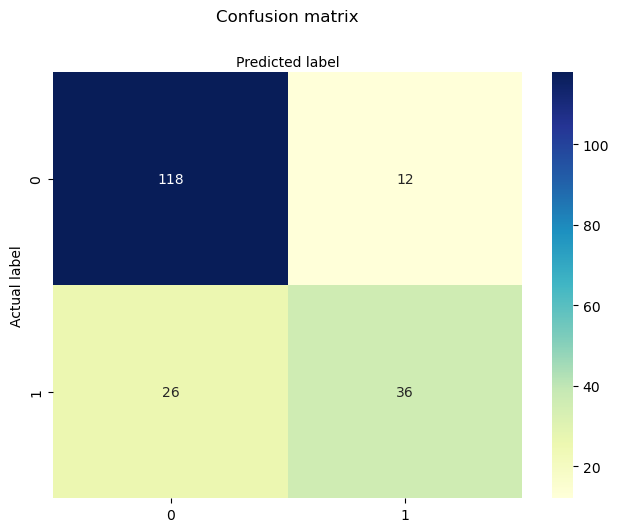

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Các chỉ số đánh giá Confusion Matrix 

Đánh giá mô hình sử dụng các chỉ số đánh giá như accuracy, precision, và recall.

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


Chúng ta có độ chính xác của mô hình là 80%.

**Precision**: có nghĩa là độ chính xác, tức là mô hình chính xác đến mức nào. Nói cách khác, khi một mô hình đưa ra dự đoán, mức độ thường xuyên dự đoán đó đúng. Trong bài toán này, khi mô hình Hồi quy Logistic dự đoán bệnh nhân sẽ mắc bệnh tiểu đường, thì có tới 75% trường hợp dự đoán chính xác là sẽ mắc bệnh tiểu đường.

**Recall**: Mô hình chỉ có thể dự đoán chính xác được 58% số bệnh nhân mắc bệnh trong bộ dữ liệu test. Còn 42% còn lại mô hình dự đoán sai khi dự đoán bệnh nhân không mắc bệnh tiểu đường, nhưng thực tế số liệu ghi nhận trong tập test cho rằng bệnh nhân lại mắc bệnh tiểu đường.

### ROC Curve

ROC (Receiver operating characteristic) là một đồ thị được sử dụng khá phổ biến trong validation các model phân loại nhị phân. Đường cong này được tạo ra bằng cách biểu diễn tỷ lệ dự báo true positive rate (TPR) dựa trên tỷ lệ dự báo failse positive rate (FPR) tại các ngưỡng Threshold khác nhau.


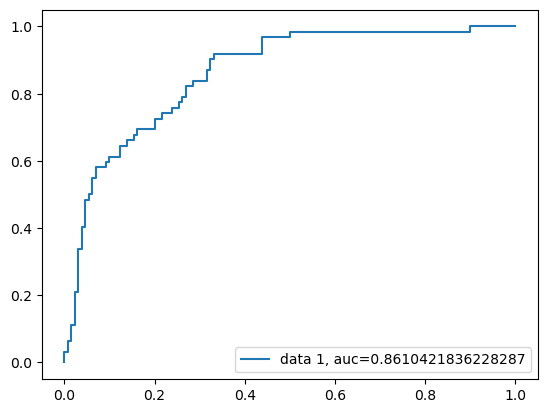

In [10]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Chỉ số AUC cho mô hình này là 0.86. Khi chỉ số AUC = 1, có nghĩa là mô hình phân loại hoàn hảo. Khi số AUC = 0.5, mô hình phân loại không thực sự tốt.

### Ưu điểm của mô hình Logistic Regression


- Hiệu quả và đơn giản, không yêu cầu khả năng tính toán cao
- Dễ thực hiện, dễ hiểu
- Được sử dụng rộng rãi bởi các nhà phân tích và nhà khoa học dữ liệu


###  Nhược điểm của mô hình Logistic Regression

- Linear Regression có một nhược điểm lớn là nhạy cảm với nhiễu.
- Khó có thể xử lý với bộ dữ liệu có nhiều biến dự đoán
- Hồi quy logistic cũng dễ bị overfitting.
- Nó không thể được áp dụng cho một bài toán phi tuyến tính, hoạt động kém với các biến độc lập không tương quan với mục tiêu và tương quan với nhau